# Hurst Exponent

The Hurst exponent is a method for measuring the self-similarity of a signal.

### Imports

In [1]:
import numpy as np

from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.run import run_sims
from apm.plts import plot_lines
from apm.plts.settings import AP_COL, COMB_COL

In [3]:
from neurodsp.aperiodic import compute_fluctuations

### Settings

In [4]:
# Simulation settings
n_seconds = 30
fs = 1000
default_exp = -2
default_freq = 10

# Collect together simulation parameters
sim_params_pow = {'n_seconds' : n_seconds, 'fs' : fs}

sim_params_comb = {'n_seconds' : n_seconds, 'fs' : fs,
                   'components' : {'sim_powerlaw' : {'exponent' : default_exp},
                                   'sim_oscillation' : {'freq' : default_freq}}}

# Hurst settings
hurst_params = {
    'fs' : fs,
    'n_scales' : 10,
    'min_scale' : 0.1,
    'max_scale' : 2.0
}

# Set the number of instances to run
n_instances = 25

# Set the exponent range to simulate across
exps = np.arange(-3, 0.25, 0.25)
freqs = np.arange(1, 50, 2)
pows = np.arange(0, 1, 0.1)

In [5]:
# Set the random seed
set_random_seed(111)

In [6]:
# Notebook settings
SAVE_FIG = False

In [7]:
def hurst_wrapper(sig, **kwargs):
    return compute_fluctuations(sig, method='rs', **kwargs)[2]

## Hurst Exponent on Example Signals

### Powerlaw Signal

In [8]:
# Set an example exponent to simulate
exp_pl = -2

In [9]:
# Simulate a powerlaw signal
sig_pl = sim_powerlaw(n_seconds, fs, exp_pl)

In [10]:
# Calculate hurst on the simulated signal
hurst_pl = hurst_wrapper(sig_pl, **hurst_params)

In [11]:
# Check the calculated hurst exponent, and the expected value
print('Hurst exponent: \t\t {:1.4f}'.format(hurst_pl))
print('Expected Hurst: \t\t {:1.4f}'.format(0.5))

Hurst exponent: 		 0.4790
Expected Hurst: 		 0.5000


### Combined Signal

In [12]:
# Simulate a combined signal
sig_comb = sim_powerlaw(**sim_params_comb)

In [13]:
# Calculate Hurst on the simulated signal
hurst_pl = hurst_wrapper(sig_comb, **hurst_params)

In [14]:
# Check the calculated Hurst exponent
print('Hurst exponent: \t\t {:1.4f}'.format(hurst_pl))

Hurst exponent: 		 0.4873


### Knee Signal

In [15]:
# Simulate a signal with a knee
sig_kn = sim_synaptic_current(n_seconds, fs)

In [16]:
# Calculate Hurst on the simulated signal
hurst_kn = hurst_wrapper(sig_kn, **hurst_params)

In [17]:
# Check the calculated Hurst exponent
print('Hurst Exponent:\t {:1.4f}'.format(hurst_kn))

Hurst Exponent:	 0.5350


## Hurst Simulations: Aperiodic Variations

In [18]:
# Run a set of simulations, calculating Hurst across exponents
hurst_sims_exp = run_sims(sim_powerlaw, sim_params_pow, hurst_wrapper, hurst_params,
                        update='update_exp', values=exps, n_instances=n_instances)

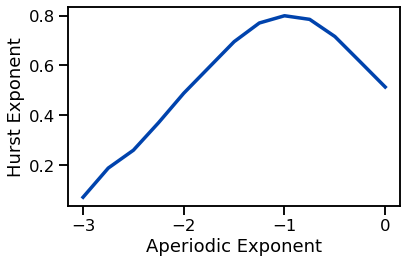

In [19]:
# Plot Hurst measures
plot_lines(exps, hurst_sims_exp, color=AP_COL)
plot_lines(xlabel='Aperiodic Exponent', ylabel='Hurst Exponent')
plot_lines(save_fig=SAVE_FIG, file_name='hurst_exp', file_path='hurst')

In [20]:
# Run a set of simulations, calculating Hurst across exponents, with an oscillation
hurst_sims_comb = run_sims(sim_combined, sim_params_comb, hurst_wrapper, hurst_params,
                             update='update_comb_exp', values=exps, n_instances=n_instances)

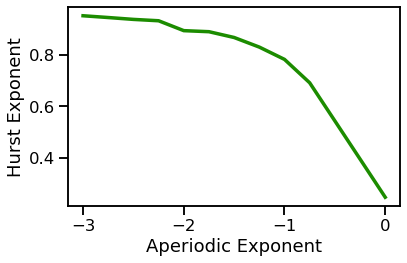

In [21]:
# Plot Hurst measures
plot_lines(exps, hurst_sims_comb, color=COMB_COL)
plot_lines(xlabel='Aperiodic Exponent', ylabel='Hurst Exponent')
plot_lines(save_fig=SAVE_FIG, file_name='hurst_comb', file_path='hurst')

#### Plot Aperiodic & Combined Together

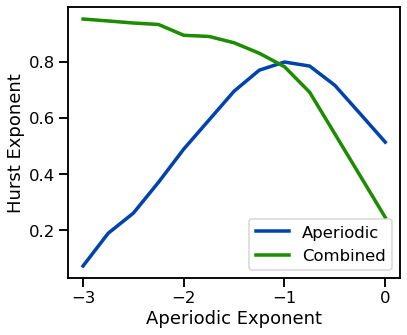

In [22]:
# Plot Hurst measures
plot_lines(figsize=(6, 5))
plot_lines(exps, hurst_sims_exp, color=AP_COL, label='Aperiodic')
plot_lines(exps, hurst_sims_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Hurst Exponent')
plot_lines(save_fig=SAVE_FIG, file_name='hurst_both', file_path='hurst')

## Hurst Simulations: Periodic Variations

In [23]:
# Run a set of simulations, calculating Hurst Exponent across oscillation frequencies
hurst_sims_freq = run_sims(sim_combined, sim_params_comb, hurst_wrapper, hurst_params,
                           update='update_freq', values=freqs, n_instances=n_instances)

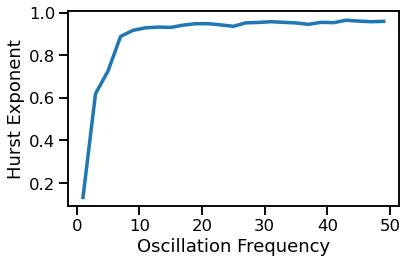

In [24]:
# Plot Hurst measures across oscillation frequency values
plot_lines(freqs, hurst_sims_freq)
plot_lines(xlabel='Oscillation Frequency', ylabel='Hurst Exponent')
plot_lines(save_fig=SAVE_FIG, file_name='hurst_osc_freq', file_path='hurst')

In [25]:
# Run a set of simulations, calculating Hurst across oscillation power
hurst_sims_pow = run_sims(sim_combined, sim_params_comb, hurst_wrapper, hurst_params,
                          update='update_pow', values=pows, n_instances=n_instances)

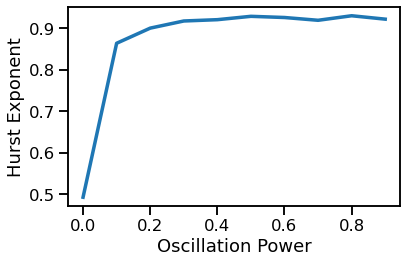

In [26]:
# Plot Hurst measures across oscillation power values
plot_lines(pows, hurst_sims_pow)
plot_lines(xlabel='Oscillation Power', ylabel='Hurst Exponent')
plot_lines(save_fig=SAVE_FIG, file_name='hurst_osc_power', file_path='hurst')